# ANZ Gig Incubation Program 2021 Assessment - Gaurav Diwan

## Information About Important Attributes

 - #### Agency Name :
                 Name of the client's agency
 - #### Contract ID : 
                 ID under which contract was secured
 - #### Publish Date :
                 Publish date of contract
 - #### Start Date : 
                 Start date of contract
 - #### End Date : 
                 End date of contract
 - #### Value : 
                 Value of the contract at the time of initiation
 - #### Amendment Date : 
                 The amendment of contract date (if happened)
 - #### Amendment Start Date :
                 The Start date of amendment
 - #### Amendment Value :
                 The value added to the original as a result of amendment
 - #### Description : 
                 Description of the service acquired by client
 - #### Agency Ref ID : 
                 Refernece ID of client's agency
 - #### UNSPSC Title : 
                 The United Nations Standard Products and Services Code is a taxonomy of products and services for use in eCommerce
 - #### Procurement Method : 
                 Tender method used by client to secure contract
 - #### Amendment Reason : 
                 The reason for amendment (if happened)
 - #### Supplier Name : 
                 The name of the client
 - #### Supplier Address : 
                 Address of the client
 - #### Supplier Suburb : 
                 Suburb of the client

In [1]:
"""
Importing Libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
Importing data set
"""
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,Agency Name,Parent Contract ID,Contract ID,Publish Date,Start Date,End Date,Value,Amendment Date,Amendment Start Date,Amendments Value,Description,Agency Ref ID,UNSPSC Code,UNSPSC Title,Procurement Method,ATM ID,SON ID,Panel Arrangement,Confidentiality Contract Flag,Confidentiality Contract Reason,Confidentiality Outputs Flag,Confidentiality Outputs Reason,Consultancy Flag,Consultancy Reason,Amendment Reason,Supplier Name,Supplier Address,Supplier Suburb,Supplier Postcode,Supplier State,Supplier Country,Supplier ABN Exempt,Supplier ABN,Contact Name,Contact Phone,Branch,Division,Office Postcode,Applicable Publish Date,Applicable FY Year,Applicable Value,Duration Years,Applicable Start Date
0,Department of Defence,NaN,CN3620990,2019-08-20,2019-05-01,2019-05-31,16163.40,NaT,NaT,NaN,Fitness Equipment,4501071435,49200000,Fitness equipment,Limited tender,NaN,NaN,NaN,No,NaN,No,NaN,No,NaN,NaN,BLP TRAINING & SERVICES PTY LTD,NaN,BEENLEIGH,4207,QLD,AUSTRALIA,No,4.007962e+10,Army Forces Command,0,Army Forces Command,ARMY HEADQUARTERS,2021,2019-08-20,2020,16163.40,0.222222,2019-05-01
1,Australian Bureau of Statistics,CN3602517,CN3602517-A1,2019-06-21,2018-07-01,2023-06-30,1964000.00,2020-05-25,2020-05-25,648000.00,Software Maintenance,ABS2018.450,81112200,Software maintenance and support,Open tender,NaN,SON3520963,Yes,No,NaN,No,NaN,No,NaN,Variation,IBM Australia Limited,NaN,Pennant Hills,1715,NSW,AUSTRALIA,No,7.900002e+10,"Director, procurement",NaN,NaN,NaN,2617,2020-05-25,2020,648000.00,3.097222,2020-05-25
2,Services Australia,NaN,CN3671573,2020-04-07,2020-03-19,2020-03-27,155997.60,NaT,NaT,NaN,Training Services,D296030217,86000000,Education and Training Services,Open tender,NaN,SON3393682,Yes,No,NaN,No,NaN,No,NaN,NaN,Benestar Group Pty Ltd,PO Box Q1436,QVB Post Office Sydney,1230,NSW,Australia,No,6.100354e+10,PURCHASING HELPDESK,1800 906 144,DHS Branch,DHS Division,2900,2020-04-07,2020,155997.60,0.027778,2020-03-19
3,Department of Health,NaN,CN3648860,2019-12-19,2020-01-02,2020-06-30,169542.12,NaT,NaT,NaN,Labour Hire,4500135727,80111700,Personnel recruitment,Open tender,RFT20000551,SON3403954,Yes,No,NaN,No,NaN,No,NaN,NaN,PEOPLEBANK AUSTRALIA LTD,NaN,NORTH SYDNEY,2060,NSW,Australia,No,4.200400e+10,BMU,02 6289 4977,NaN,Cancer Hearing and Program Support DIV,2606,2019-12-19,2020,169542.12,0.530556,2020-01-02
4,Administrative Appeals Tribunal,CN3591066,CN3591066-A1,2019-05-13,2019-02-27,2019-07-31,13263.55,2019-07-25,2019-06-01,13263.55,Labour hire contractor,4500000293,80111600,Temporary personnel services,Limited tender,NaN,NaN,NaN,No,NaN,No,NaN,No,NaN,Extension date,LAUNCH RECRUITMENT PTY LTD,LEVEL 10 1 CASTLEREAGH STREET,SYDNEY,2000,NSW,AUSTRALIA,No,5.411914e+10,PROCUREMENT OFFICER,(03)9454 6100,Administrative Appeals Tribunal Administrative...,AAT Administrative Appeals Tribunal,4000,2019-07-25,2020,13263.55,0.016667,2019-06-01


In [4]:
print(f'Total columns are {len(list(df.columns))}')
print(f'Column Names are :  \n {list(df.columns)}')

Total columns are 43
Column Names are :  
 ['Agency Name', 'Parent Contract ID', 'Contract ID', 'Publish Date', 'Start Date', 'End Date', 'Value', 'Amendment Date', 'Amendment Start Date', 'Amendments Value', 'Description', 'Agency Ref ID', 'UNSPSC Code', 'UNSPSC Title', 'Procurement Method', 'ATM ID', 'SON ID', 'Panel Arrangement', 'Confidentiality Contract Flag', 'Confidentiality Contract Reason', 'Confidentiality Outputs Flag', 'Confidentiality Outputs Reason', 'Consultancy Flag', 'Consultancy Reason', 'Amendment Reason', 'Supplier Name', 'Supplier Address', 'Supplier Suburb', 'Supplier Postcode', 'Supplier State', 'Supplier Country', 'Supplier ABN Exempt', 'Supplier ABN', 'Contact Name', 'Contact Phone', 'Branch', 'Division', 'Office Postcode', 'Applicable Publish Date', 'Applicable FY Year', 'Applicable Value', 'Duration Years', 'Applicable Start Date']


In [5]:
row, columns = df.shape
print(f'Total Rows are : {row}')
print(f'Total Columns are : {columns}')

Total Rows are : 81174
Total Columns are : 43


## Step 01 : Data Cleaning and Feature Extraction  

In [6]:
"""
Deleting Columns having high majority empty values
"""
c1 = df['Parent Contract ID']
c2 = df['ATM ID']
c3 = df['SON ID']
c4 = df['Panel Arrangement']
c5 = df['Confidentiality Contract Flag']
c6 = df['Confidentiality Outputs Reason']
c7 = df['Consultancy Reason']

print(f"Deleting follwing columns because they have very large number of empty rows")
print(f'Empty values in Parent Contract ID : {c1.isna().sum()}')
print(f'Empty values in ATM ID : {c2.isna().sum()}')
print(f'Empty values in SON ID : {c3.isna().sum()}')
print(f'Empty values in Panel Arrangement : {c4.isna().sum()}')
print(f'Empty values in Confidentiality Contract Flag : {c5.isna().sum()}')
print(f'Empty values in Confidentiality Outputs Reason : {c6.isna().sum()}')
print(f'Empty values in Consultancy Reason : {c7.isna().sum()}')

df = df.drop(['Parent Contract ID', 'ATM ID', 'SON ID', 'Panel Arrangement', 'Confidentiality Contract Flag', 'Confidentiality Outputs Reason', 'Consultancy Reason'], axis=1)

Deleting follwing columns because they have very large number of empty rows
Empty values in Parent Contract ID : 65254
Empty values in ATM ID : 54697
Empty values in SON ID : 48619
Empty values in Panel Arrangement : 48697
Empty values in Confidentiality Contract Flag : 1124
Empty values in Confidentiality Outputs Reason : 79393
Empty values in Consultancy Reason : 77696


In [7]:
"""
Deleting Useless Columns
"""

df = df.drop(['Confidentiality Outputs Flag', 'Consultancy Flag', 'Supplier ABN'], axis=1)

df.columns

Index(['Agency Name', 'Contract ID', 'Publish Date', 'Start Date', 'End Date',
       'Value', 'Amendment Date', 'Amendment Start Date', 'Amendments Value',
       'Description', 'Agency Ref ID', 'UNSPSC Code', 'UNSPSC Title',
       'Procurement Method', 'Confidentiality Contract Reason',
       'Amendment Reason', 'Supplier Name', 'Supplier Address',
       'Supplier Suburb', 'Supplier Postcode', 'Supplier State',
       'Supplier Country', 'Supplier ABN Exempt', 'Contact Name',
       'Contact Phone', 'Branch', 'Division', 'Office Postcode',
       'Applicable Publish Date', 'Applicable FY Year', 'Applicable Value',
       'Duration Years', 'Applicable Start Date'],
      dtype='object')

In [8]:
len(df.columns)

33

In [9]:
"""
Dropping three more columns are these are mere duplicates
"""
df = df.drop([ 'Applicable Start Date', 'Applicable Value', 'Applicable Publish Date'], axis=1)

In [10]:
len(df.columns)

30

In [11]:
"""
Adding the initial value and the amendments value to get a final value produced by client
"""
valueBefore = df['Value']
valueAfter = np.where(df['Amendments Value'].isna(), 0, df['Amendments Value'])
df['Total Value'] = valueBefore + valueAfter

In [12]:
"""
Converting date time to only date data type
"""
df['Publish Date'] = df['Publish Date'].dt.date
df['Start Date'] = df['Start Date'].dt.date
df['End Date'] = df['End Date'].dt.date
df['Amendment Start Date'] = df['Amendment Start Date'].dt.date

### Problem Statement 01 i.e.
 
 Which customers should Bank X provide their service to and why? Provide the criteria, explanation or approach to obtain the list of customers

##### Solution Criteria for top 10 customers
 - Customers providing the highest value in past 10 years

##### Approach Used will be
 
 - We will be getting the customers providing highest values for the period between 2010 and 2020

In [13]:
startDate = pd.DatetimeIndex(df['Publish Date']).year <= 2020
endDate = pd.DatetimeIndex(df['Publish Date']).year >= 2010
mask = startDate & endDate

In [14]:
"""
Starting solution
"""
temp_data = df.loc[mask]

In [15]:
"""
Change data type of columns
"""
temp_data['Total Value'] = temp_data['Total Value'].astype('int64')
temp_data['Value'] = temp_data['Value'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
customersDF = temp_data.sort_values(['Total Value'], ascending=False)

In [17]:
customersDF = customersDF.groupby(by='Supplier Name')

In [18]:
"""
Displaying Top 10 Customers
"""
tempCustDf = pd.DataFrame()
tempCustDf['Agency Name'] = customersDF.first()['Agency Name'][:10]
tempCustDf['Total Value'] = customersDF.first()['Total Value'][:10]
tempCustDf['Publish Date'] = customersDF.first()['Publish Date'][:10]
tempCustDf['Start Date'] = customersDF.first()['Start Date'][:10]
tempCustDf['End Date'] = customersDF.first()['End Date'][:10]
tempCustDf.sort_values(by='Total Value', ascending=False)

,Agency Name,Total Value,Publish Date,Start Date,End Date
Supplier Name,,,,,
(USD) CITRIX SYSTEMS AUSTRALIA,Department of Home Affairs,2181255,2020-04-09,2020-03-27,2021-03-26
101 Web Technology,Office of Parliamentary Counsel,1416868,2018-04-24,2018-03-16,2021-03-24
120 Collins Street Pty Limited,Future Fund Management Agency,344344,2019-12-18,2019-11-07,2021-11-07
"""Dept of Industry, Innovation"" and Science",Department of Finance,259300,2020-03-10,2019-02-11,2020-06-30
102324 GHD Pty Ltd (Adelaide),Bureau of Meteorology,109718,2019-09-24,2019-09-20,2021-06-30
0956196 BC LTD,Department of Defence,63910,2020-01-14,2019-11-27,2020-02-29
(DML) DEBE MEKIK LE CONSULTANCY PTY LTD,Australian Fisheries Management Authority,44000,2019-11-29,2019-11-12,2020-05-31
6326,Australian Signals Directorate,20983,2020-04-24,2020-05-04,2021-05-03
10ZIG TECHNOLOGY (ASIA PACIFIC),Department of Defence,14960,2019-09-05,2019-09-03,2019-10-14


### Problem Statement 02 i.e.
 
 To meet with agency/supplier representatives regularly, where should Bank X set up their office(s) to serve them better?

##### Solution Criteria for top 10 locations
 - Get the suburbs where high valued customers are residing
 
##### Approach Used will be 
 - Will get all the suburb locations where high valued customers are residing and also personal suggestion

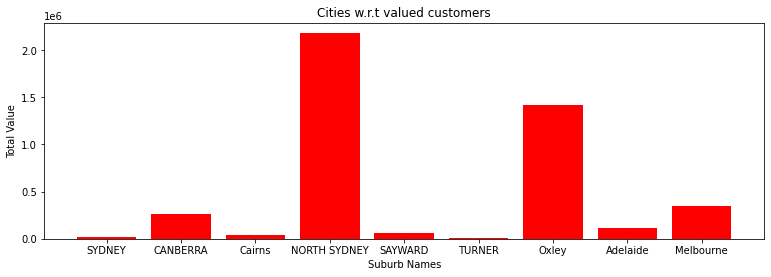

In [19]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(customersDF.first()['Supplier Suburb'][:10], customersDF.first()['Total Value'][:10], color='r')
ax.set_ylabel('Total Value')
ax.set_xlabel('Suburb Names')
ax.set_title('Cities w.r.t valued customers')
plt.show()

#### Personal Recommendation
 - My recommendation is that the bank should consider locations around North Sydney, Oxley, Melbourne and CANBERRA localities to increase its value

### Problem Statement 03 i.e.

Bank X is planning to use machine learning to drive decision-making. Provide a machine learning use case for this dataset with the following details.
 -  Problem statement
 - Proposed solution
 -  Machine learning algorithm
 -  Pros/Cons
 -  Sample implementation of the machine learning algorithm

##### Problem Statement
 - Which agencies are likely to provide high value in the future?

##### Proposed Solution

 - First we will perform Clustering on agencies to put them in 3 sets i.e. 0 = Less Valued, 1 = Average Valued  and 2 = Highest Valued Client
 - Then we will perform classification on the data to classifiy a agency among one of these categories

##### Machine Learning Algorithm
  - We've uses Kmeans clustering to perform Clustering
  - We have used Support Vector Machine Classfication to perform Classficiation

##### Pros/Cons
  - Pros are :
   . We can predict high valued agencies and the clients related to those industries and extend our services accordingly
  - Cons are :
   . There is a thin possibility that low valued clients or average get ignored in some way

##### Sample Implementation is as follows:

In [20]:
"""
Importing Kmeans Cluster
"""
from sklearn.cluster import KMeans

"""
Importing svc for classficiation
"""
from sklearn import svm
from sklearn.model_selection import train_test_split

In [21]:
kmeans = KMeans(n_clusters=3)

In [22]:
customersDF.first().columns

Index(['Agency Name', 'Contract ID', 'Publish Date', 'Start Date', 'End Date',
       'Value', 'Amendment Date', 'Amendment Start Date', 'Amendments Value',
       'Description', 'Agency Ref ID', 'UNSPSC Code', 'UNSPSC Title',
       'Procurement Method', 'Confidentiality Contract Reason',
       'Amendment Reason', 'Supplier Address', 'Supplier Suburb',
       'Supplier Postcode', 'Supplier State', 'Supplier Country',
       'Supplier ABN Exempt', 'Contact Name', 'Contact Phone', 'Branch',
       'Division', 'Office Postcode', 'Applicable FY Year', 'Duration Years',
       'Total Value'],
      dtype='object')

In [23]:
dfForCluster = pd.DataFrame()
dfForCluster['Total Value'] = customersDF.first()['Total Value']
dfForCluster['Procurement Method'] = pd.factorize(customersDF.first()['Procurement Method'])[0]
dfForCluster['Agency Name'] = pd.factorize(customersDF.first()['Agency Name'])[0]
dfForCluster.head()

,Total Value,Procurement Method,Agency Name
Supplier Name,,,
6326,20983,0,0
"""Dept of Industry, Innovation"" and Science",259300,1,1
(DML) DEBE MEKIK LE CONSULTANCY PTY LTD,44000,0,2
(USD) CITRIX SYSTEMS AUSTRALIA,2181255,0,3
0956196 BC LTD,63910,0,4


In [24]:
kmeans.fit(dfForCluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
clusters = kmeans.cluster_centers_

In [26]:
#Print out the clusters
clusters

array([[3.93863309e+06, 3.59169303e-01, 2.18005919e+01],
       [1.40136650e+10, 2.00000000e+00, 4.00000000e+00],
       [2.98539412e+09, 8.18181818e-01, 5.45454545e+00]])

In [27]:
# Predicting Clusters
y_km = kmeans.fit_predict(dfForCluster)

In [28]:
y_km.shape,dfForCluster.shape

((19610,), (19610, 3))

In [29]:
"""
Creating instance and fitting the model
"""
X_train, X_test, y_train, y_test = train_test_split(dfForCluster, y_km, test_size=0.2)
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
"""
Taking the predictions
"""
y_preds = clf.predict(X_test)

In [31]:
"""
Comparing the predictions vs true labels
"""
y_preds[0], y_test[12]

(0, 0)